# Fundamentos de Data Science
Analizando la Rotación de Clientes en Telecomunicaciones

Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

# Limpieza de datos con Python:

## Identificar y solucionar cualquier valor duplicado.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('../data/Tele_com.csv')
print(df.shape)
df.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Detección y eliminación de valores duplicados

duplicados = df.duplicated()
print(f"Se han detectado {duplicados.sum()} registros duplicados")

Se han detectado 0 registros duplicados


## Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [ ]:
df.info()

In [ ]:
# Creo un diccionario con los tipos de datos deseados y los reemplazo
data_type = {
    'customerID' : 'string',
    'gender' : 'category',
    'SeniorCitizen' : 'category',
    'Partner' : 'category',
    'Dependents' : 'category',
    'PhoneService' : 'category',
    'MultipleLines' : 'category',
    'InternetService' : 'category',
    'OnlineSecurity' : 'category',
    'OnlineBackup' : 'category',
    'DeviceProtection' : 'category',
    'TechSupport' : 'category',
    'StreamingTV' : 'category',
    'StreamingMovies' : 'category',
    'Contract' : 'category',
    'PaperlessBilling' : 'category',
    'PaymentMethod' : 'category',
    'TotalCharges' : 'float64',
    'Churn' : 'category'
}
df = df.astype(data_type)
print(df.dtypes)

verificamos un error al intentar convertir los tipos de datos en la columna TotalCharges

In [ ]:
# Filtrar valores que no se pueden convertir a float
non_numeric_values = df[~df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]

print("Valores no numéricos en la columna 'TotalCharges':")
print(non_numeric_values['TotalCharges'])


### Vemos que los valores que no se pueden convertir a float en realidad son enteros pero probablemente se hayan cargado con espacio en blanco

In [ ]:
# Eliminar espacios en blanco al inicio y al final de cada valor
df['TotalCharges'] = df['TotalCharges'].str.strip()

# Convertir a numérico, usando 'coerce' para forzar valores no convertibles a NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verifica que la columna ahora sea de tipo float
print(df['TotalCharges'].info())

In [ ]:
df = df.astype(data_type)
print(df.dtypes)

### Despues de eliminar los espacios en blanco se puedo realizar la conversion de tipo

## Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [48]:
# Consistencia en valores categóricos: 
# Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

# identifico las columnas de tipo cadena
columnas_string = df.select_dtypes(include=['category', 'string'])

# Mostrar valores únicos de cada columna de tipo cadena
for col in columnas_string.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'customerID':
<StringArray>
['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
 '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
 ...
 '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
 '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7043, dtype: string

Valores únicos en la columna 'gender':
['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Valores únicos en la columna 'SeniorCitizen':
[0, 1]
Categories (2, int64): [0, 1]

Valores únicos en la columna 'Partner':
['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Valores únicos en la columna 'Dependents':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Valores únicos en la columna 'PhoneService':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Valores únicos en la columna 'MultipleLines':
['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

Valores único

### Resolucion de problemas de los valores categoricos
Todas las columnas categoricas tienen valores verificables mirando los valores unicos ya que solo tiene 2 o 3 opciones en su mayoria
solo la columna de customerID tenia demasiados datos ya que cada valor debe ser diferente y tiene una estructura unica por lo que se decide que es mejor
no modificarlos convirtiendolo en minusculas ni quitandole el guion
Pero como medida extra se verifica que todos sigan esta estructura preestablecida de modo a asegurar la consistencia de la columna

In [ ]:
# Verificar si todos los valores cumplen con el formato deseado
pattern = r'^\d{4}-[A-Za-z]{5}$'
invalid_ids = df[~df['customerID'].str.match(pattern)]

if invalid_ids.empty:
    print("Todos los customerID cumplen con el formato 0000-AAAAA.")
else:
    print("Los siguientes customerID no cumplen con el formato:")
    print(invalid_ids['customerID'])

## Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [ ]:
# funcion para visualizar los valores faltantes en % 
# fuente del codigo: https://github.com/iair/mitic-data-science-team-1-septiembre-2024/blob/main/clases/ds-fundamentals/semana-3/valores_nulos_2.ipynb

qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

In [ ]:
# verificamos los registros con valores nulos
num_nans = df['TotalCharges'].isna().sum()
print(f"Total de valores NaN en la columna: {num_nans}")
# ver los registros donde hay valores nulos
print(df[df['TotalCharges'].isna()][['Contract', 'tenure', 'MonthlyCharges', 'TotalCharges']].head(11))

In [39]:
# Reemplazar NaN en la columna TotalCharges por 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [40]:
# Verificamos que ya no haya valores faltantes
num_nans = df['TotalCharges'].isna().sum()
print(f"Total de valores NaN en la columna: {num_nans}")
print(df['TotalCharges'].shape)

Total de valores NaN en la columna: 0
(7043,)


### Justificacion de porque se reemplazo por 0:
los valores nulos correspondian a usuarios que aun no cumplian un mes con la compañia por lo que aun no hay cargos a pagar

## Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [ ]:
# se verifica algunas posibles columnas conflictivas
verif_columnas = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[verif_columnas].describe()

### Valores inusuales:
No se encuentran valores inusuales, los maximos y minimos estan dentro de los parametros normales en terminos de pagos por servicios

# Exploración de datos con Python:

## Crear dos tipos diferentes de visualizaciones exploratorias univariadas. 
Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Text(0.5, 0, 'Total Charges')

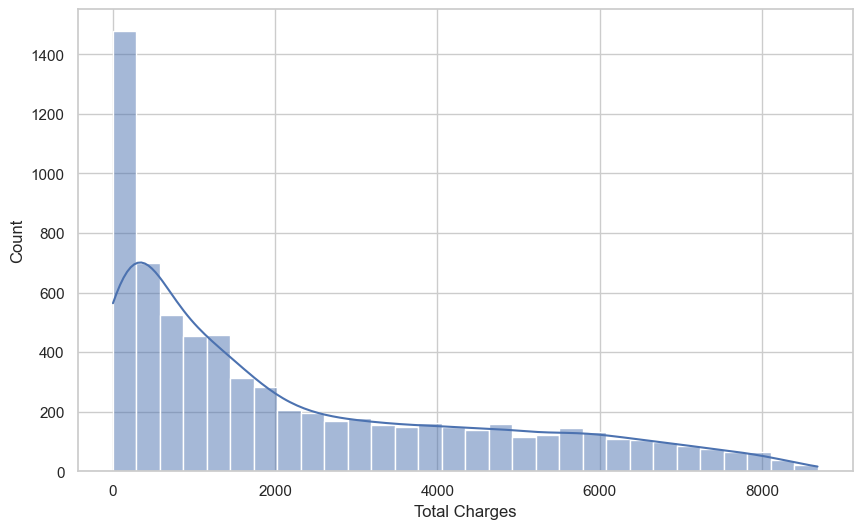

In [42]:
# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crea el histograma
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.histplot(df['TotalCharges'], bins=30, kde=True)  # kde=True para incluir la curva de densidad

# Agregar etiquetas y título
plt.xlabel('Total Charges')

Arriba en el histograma de cargos totales vemos los datos sesgados a la izquierda con un pico en el primer rango de aproximadamente 300
* Esto quiere decir que hay muchos nuevos clientes ya que han pagado pocos meses aun

Text(0.5, 0, 'Meses del cliente con la compañia o antiguedad en meses')

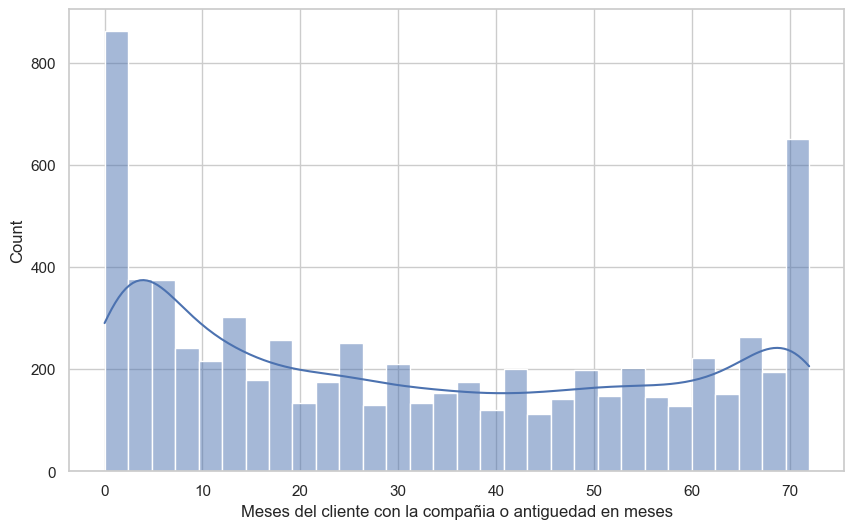

In [71]:
sns.set(style="whitegrid")

# Crea el histograma
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.histplot(df['tenure'], bins=30, kde=True)  # kde=True para incluir la curva de densidad

# Agregar etiquetas y título
plt.xlabel('Meses del cliente con la compañia o antiguedad en meses')

En el hsitograma de fidelidad en meses vemos algo interesante, ya que esta sesgado en los extremos
* Esto implicaria mucho cliente nuevos como ya notamos anteriormente, pero tambien tiene muchos clientes con 70 meses aprox.
* Entre estos picos vemos por el medio una muy buena distribucion de los datos

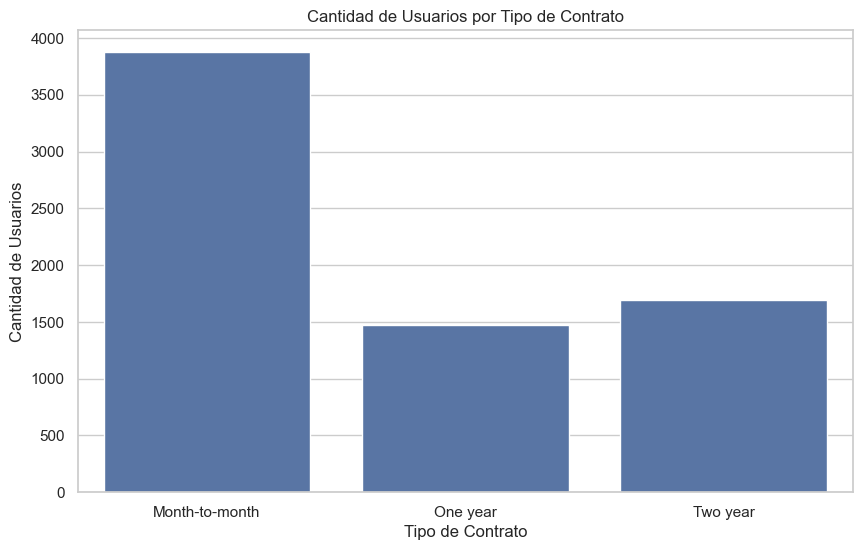

In [50]:
# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Contar la cantidad de usuarios por tipo de contrato
contract_counts = df['Contract'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.barplot(x=contract_counts.index, y=contract_counts.values)

# Agregar etiquetas y título
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Usuarios por Tipo de Contrato')

# Mostrar el gráfico
plt.show()

En el grafico de barras separamos la cantidad de usuarios por tipo de contrato para ver una amplia preferencia del contrato mes por mes

## Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. 
Cada visualización debe incluir una breve interpretación dentro del archivo de código.


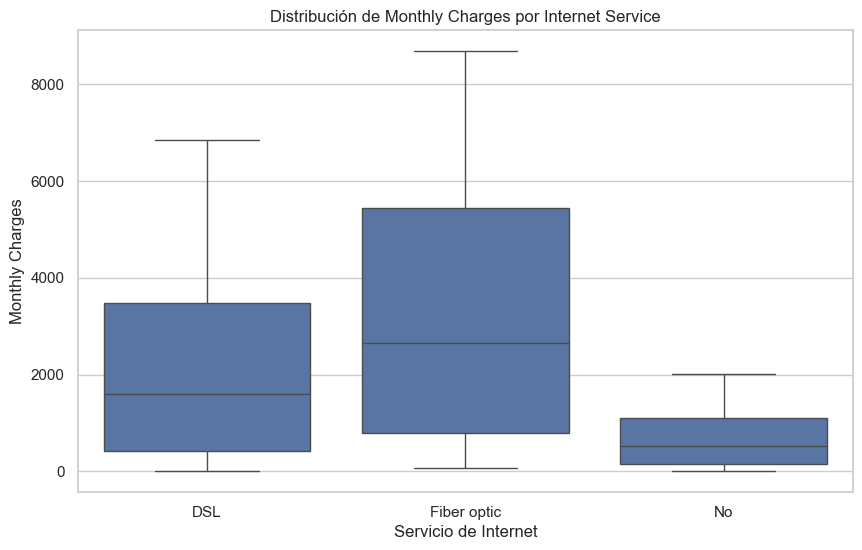

In [52]:
# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crea el boxplot
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df, x='InternetService', y='TotalCharges')

# Agregar etiquetas y título
plt.xlabel('Servicio de Internet')
plt.ylabel('Monthly Charges')
plt.title('Distribución de Total Charges por Internet Service')

# Mostrar el gráfico
plt.show()

- En la distribucion de usuarios segun la categoria internet service vemos como es de esperar mayor concentracion en el tipo de internet de fibra optica
- Aun asi hay bastante clientes que pagan el internet por cable (DSL)

In [60]:
# Crear intervalos de antigüedad
bins = range(0, df['tenure'].max() + 6, 6)  # Intervalos de 6 meses
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Etiquetas para los intervalos

# Crear una nueva columna con los intervalos de antigüedad
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Calcular el promedio de MonthlyCharges por cada grupo de antigüedad
average_monthly_charges = df.groupby('tenure_group')['MonthlyCharges'].mean().reset_index()

C:\Users\IK\AppData\Local\Temp\ipykernel_3420\1376101819.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_monthly_charges = df.groupby('tenure_group')['MonthlyCharges'].mean().reset_index()


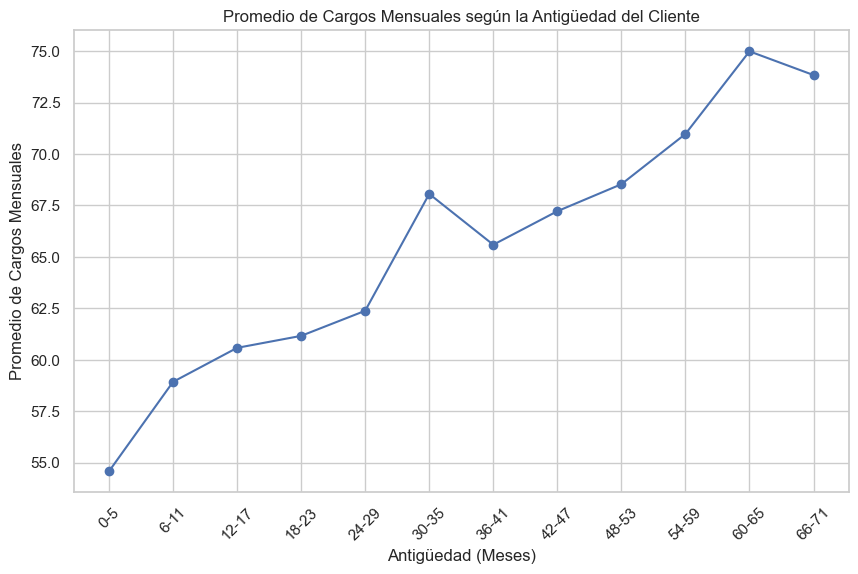

In [64]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(average_monthly_charges['tenure_group'], average_monthly_charges['MonthlyCharges'], marker='o')

# Agregar etiquetas y título
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Promedio de Cargos Mensuales')
plt.title('Promedio de Cargos Mensuales según la Antigüedad del Cliente')

# Mostrar el gráfico
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

Creando un rango de antiguedad por cada 5 meses, podemos ver que el promedio sube de forma casi constante, en otras palabras los clientes mas antiguos
estan pagando mas cantidad que los nuevos.
Esto es bastante normal en el servicio ya que los precios bajos atraen cliente, pero normalmente la cantidad se va ajustando con el tiempo

C:\Users\IK\AppData\Local\Temp\ipykernel_3420\2504122392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_contract = df.groupby('Contract')['MonthlyCharges'].mean().reset_index()


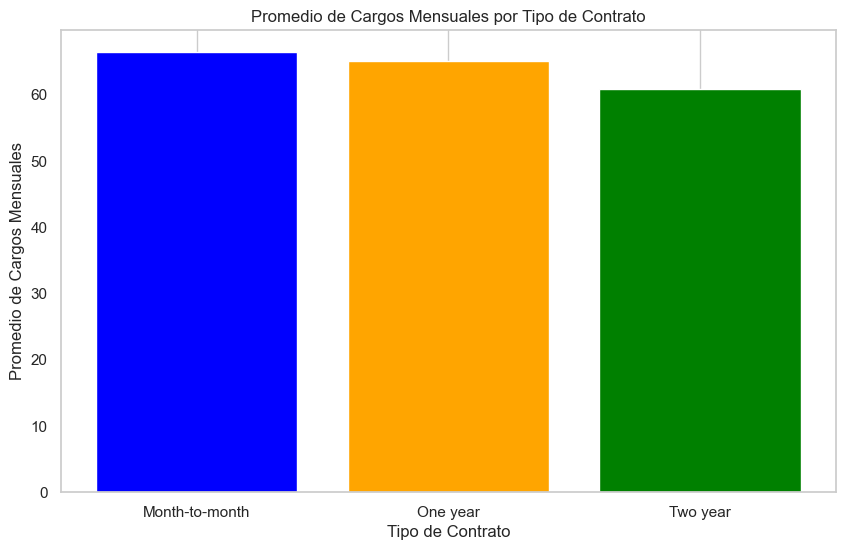

In [62]:
# Calcular el promedio de MonthlyCharges por tipo de contrato
average_charges_by_contract = df.groupby('Contract')['MonthlyCharges'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(average_charges_by_contract['Contract'], average_charges_by_contract['MonthlyCharges'], color=['blue', 'orange', 'green'])

# Agregar etiquetas y título
plt.xlabel('Tipo de Contrato')
plt.ylabel('Promedio de Cargos Mensuales')
plt.title('Promedio de Cargos Mensuales por Tipo de Contrato')

# Mostrar el gráfico
plt.grid(axis='y')  # Agregar una cuadrícula en el eje y para mejor visualización
plt.show()

Se puede notar una pequeña diferancia entre el pago pomedio mensual segun el tipo de contrato, al adquirir un contrato de mayor duracion se 
paga menos que paganado mes a mes

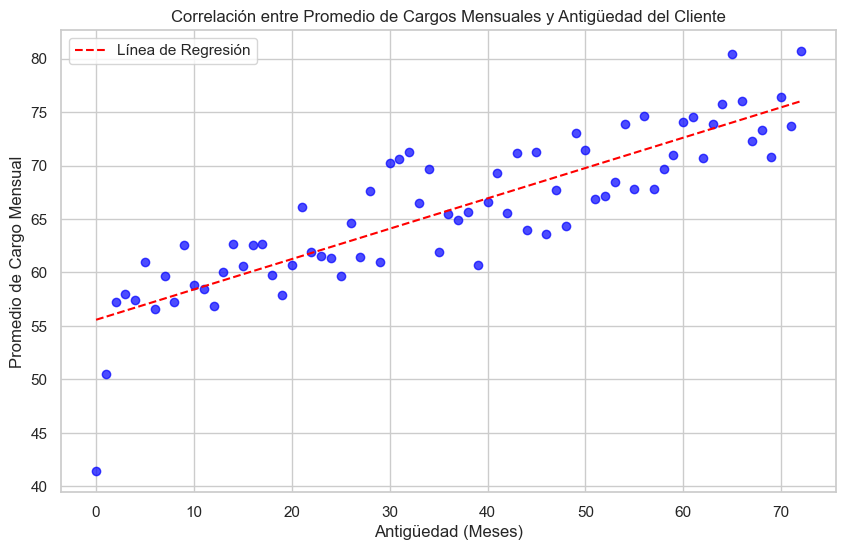

In [70]:
average_monthly_charges = df.groupby('tenure')['MonthlyCharges'].mean().reset_index()

plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.scatter(average_monthly_charges['tenure'], average_monthly_charges['MonthlyCharges'], color='blue', alpha=0.7)

# Calcular la línea de regresión
m, b = np.polyfit(average_monthly_charges['tenure'], average_monthly_charges['MonthlyCharges'], 1)
plt.plot(average_monthly_charges['tenure'], m * average_monthly_charges['tenure'] + b, color='red', linestyle='--', label='Línea de Regresión')

# Agregar etiquetas y título
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Promedio de Cargo Mensual')
plt.title('Correlación entre Promedio de Cargos Mensuales y Antigüedad del Cliente')
plt.legend()  # Agregar leyenda

# Mostrar el gráfico
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.show()

Nuevamente podemos notar una relacion entre el promedio de cargos por mes de los clientes que sube con su antiguedad.

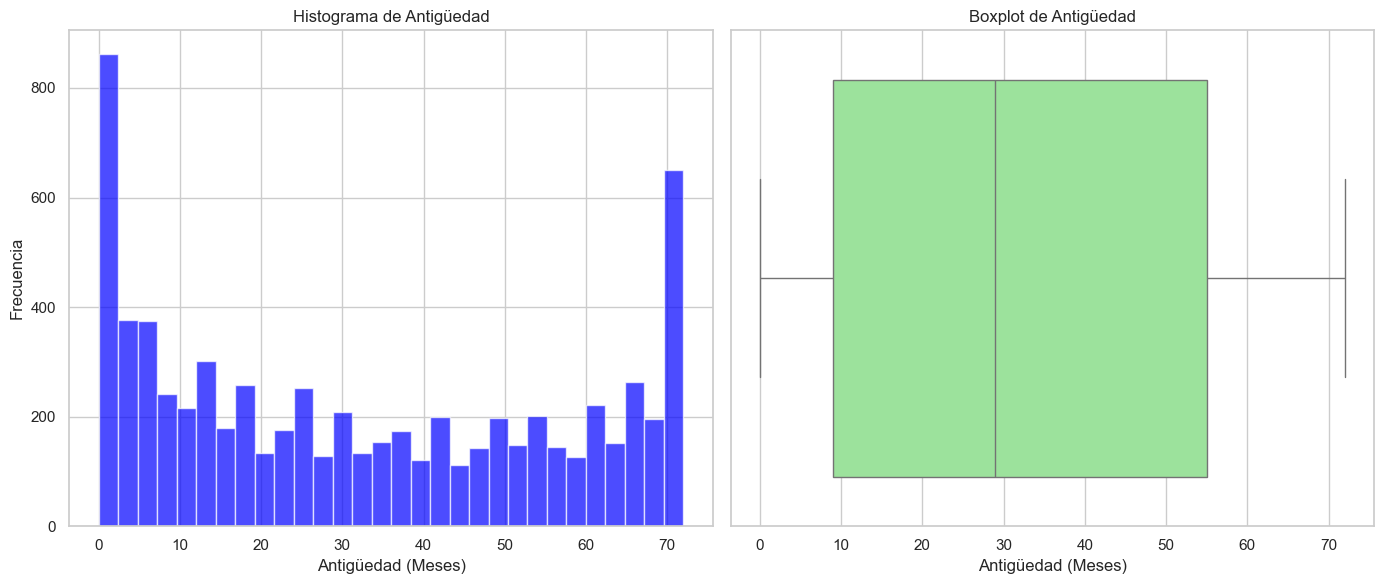

In [72]:
# Crear un subplot con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Tamaño de la figura

# Histograma en el primer subplot
axs[0].hist(df['tenure'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Histograma de Antigüedad')
axs[0].set_xlabel('Antigüedad (Meses)')
axs[0].set_ylabel('Frecuencia')

# Boxplot en el segundo subplot
sns.boxplot(x=df['tenure'], ax=axs[1], color='lightgreen')
axs[1].set_title('Boxplot de Antigüedad')
axs[1].set_xlabel('Antigüedad (Meses)')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En conlusion, si nos fijamos en la curva del grafico de antiguedad mirando desde el centro hacia la izquierda podemos notar que la cantidad de usuarios 
sube lo que significa que hay muchos nuevos clientes